<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distributions

Probability distributions provide a way to quantify the likelihood of an outcome occurring, given data from an experiment. This data can be discrete or continuous. Discrete data has a countable nature, such as a dataset of students and their letter grades. On the other hand, continuous data spans an infinite range of possible values. For example, filling a car with x amount of gas would allow the car to travel y kilometers.

### Probability Axioms
Probability has a set of axioms which lay down the foundation of probability theory. An **experiment** can be thought of as an action performed on a given dataset or object to observe and measure outcomes. The set of all possible outcomes of an experiment is known as the sample space, commonly denoted as $s$. However, an **event** is a subset of this sample space. An event is *simple* if it consists of a single sample from the sample space, and *compound* if it consists of more than one outcome. Furthermore, a probability distribution of an event $A$ is denoted as $P(A)$. Probabilities must follow the following properties:

- For any event $A_1$, $P(A_1) \geq 0$
- $P(S) = 1$
- If $A_1, A_2, A_3, \dots$ is an infinite collection of disjoint events, then
  $
  P(A_1 \cup A_2 \cup A_3 \cup \dots) = \sum_{i=1}^{\infty} P(A_i)
  $
- For any event $A$, $P(A) + P(A') = 1$, from which $P(A) = 1 - P(A')$
- When events $A$ and $B$ are mutually exclusive, $P(A \cup B) = P(A) + P(B)$
- For any two events $A$ and $B$,
  $
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
  $
- Furthermore, it is simple to deduce  if there is $N$ outcomes in experiment with each of them having equal probabilities, then
$
P(A)= \frac{N(A)}{A}  \text{ where N(A) is the probability of each outcome in the experiment}
$



In [ ]:
import numpy as np

# Probability of an event: rolling a fair six-sided dice
sample_space = [1, 2, 3, 4, 5, 6]

# Simple event of rolling a 3
event_A = [3]

# A compound event of rolling odd number
event_B = [1, 3, 5]

# Calculate the probability of an event
def probability(event, sample_space):
    return len(event) / len(sample_space)


# Axioms of Probability

# Non-negative probabilities
P_A = probability(event_A, sample_space)
print(f"P(A): {P_A} (Non-negative property satisfied)")

# The probability of the entire sample space is 1
P_S = probability(sample_space, sample_space)
print(f"P(S): {P_S} (Total probability of sample space is 1)")

# Mutually exclusive events

event_A = [2]  # Rolling a 2
event_B = [4]  # Rolling a 4

P_A_union_B = P_A + probability(event_B, sample_space)
print(f"P(A or B): {P_A_union_B} (For mutually exclusive events, sum of probabilities)")

# Union of two non-exclusive events
event_A = [1, 2]
event_B = [2, 4, 6]
P_A = probability(event_A, sample_space)
P_B = probability(event_B, sample_space)
P_A_intersection_B = probability([2], sample_space)  # Intersection is only rolling 2
P_A_union_B = P_A + P_B - P_A_intersection_B
print(f"P(A union B): {P_A_union_B} (Union of two non-exclusive events)")


# Complement of an event of rolling odds
event_A = [2, 4, 6]
P_A = probability(event_A, sample_space)
print(f"P(A) (rolling an even number): {P_A}")


# the probability of event A is N(A) / N(S), where N(S) is the sample space and N(A) is favorable outcomes
print(f"General formula P(A) = {len(event_A)}/{len(sample_space)} = {P_A}")

# Demonstrating complement of an event, rolling odd numbers

event_A_complement = [1, 3, 5]
P_A_complement = probability(event_A_complement, sample_space)
print(f"P(A') (rolling an odd number): {P_A_complement}")
print(f"P(A) + P(A') = {P_A + P_A_complement} (Should equal 1, law of complement)")


P(A): 0.16666666666666666 (Non-negative property satisfied)
P(S): 1.0 (Total probability of sample space is 1)
P(A or B): 0.3333333333333333 (For mutually exclusive events, sum of probabilities)
P(A union B): 0.6666666666666666 (Union of two non-exclusive events)
P(A) (rolling an even number): 0.5
General formula P(A) = 3/6 = 0.5
P(A') (rolling an odd number): 0.5
P(A) + P(A') = 1.0 (Should equal 1, law of complement)


### Conditional probability
A powerful concept of probability is conditional probability. It is used to calculate the probability of outcomes based on prior events. It is expressed as the relationship between two unconditional probabilities. The numerator is the intersection of two events, and the denominator represents the conditioning event. It is formally expressed as:
$$
P(A | B)= \frac{P(A \cap B)}{P(B)}
$$

Conditional probability is a powerful concept and is widely used in many classic machine learning models, such as Logistic Regression, Naive Bayes, Bayesian Networks, Hidden Markov Models, and Markov Chains.

Here are some supplemental definitions:

The probability that a given event occurs based on another one is: $ P(A | B) = \frac{P(A \cap B)}{P(B)} $

Additionally, the probability of two event occurring is denoted as : $ P(A \cap B) = P(A | B) \cdot P(B)$

Events are independent if they don't depend on each other if $P(A | B) = P(A)$ (or $P(A \cap B) = P(A) \cdot P(B)$). If this doesn't hold true they are dependent.

Similarly this can be applied to more than two events:
If events $A_1, \dots, A_n$ are mutually independent, it means that any group of these events, no matter how many you choose, will also be independent:
$
 P(A_{i_1} \cap A_{i_2} \cap \dots \cap A_{i_k}) = P(A_{i_1}) \cdot P(A_{i_2}) \cdots P(A_{i_k})
$



In [ ]:
import random

# P(A | B) = P(A ∩ B) / P(B)
def conditional_probability(P_A_and_B, P_B):
    if P_B == 0:
        return 0
    return P_A_and_B / P_B

# P(A ∩ B) = P(A | B) * P(B)
def joint_probability(P_A_given_B, P_B):
    return P_A_given_B * P_B

# P(A | B) == P(A)
def check_independence(P_A_given_B, P_A):
    return P_A_given_B == P_A

# probabilities for two events A and B
P_A = 0.5    # Probability of event A
P_B = 0.4    # Probability of event B
P_A_given_B = 0.7  # Probability of A given B (P(A | B))

# Calculate joint probability P(A ∩ B)
P_A_and_B = joint_probability(P_A_given_B, P_B)
print(f"Joint Probability P(A ∩ B): {P_A_and_B:.2f}")

# Calculate conditional probability P(A | B)
P_A_given_B_calculated = conditional_probability(P_A_and_B, P_B)
print(f"Conditional Probability P(A | B): {P_A_given_B_calculated:.2f}")

# Check if A and B are independent
is_independent = check_independence(P_A_given_B, P_A)
print(f"Are A and B independent? {'Yes' if is_independent else 'No'}")

#Proof of construction
# A1, A2, and A3 are independent probabilities
P_A1 = 0.3
P_A2 = 0.5
P_A3 = 0.6

# P(A1 ∩ A2 ∩ A3) = P(A1) * P(A2) * P(A3) (if they are mutually independent)
P_A1_A2_A3 = P_A1 * P_A2 * P_A3
print(f"Joint Probability P(A1 ∩ A2 ∩ A3): {P_A1_A2_A3:.2f}")


Joint Probability P(A ∩ B): 0.28
Conditional Probability P(A | B): 0.70
Are A and B independent? No
Joint Probability P(A1 ∩ A2 ∩ A3): 0.09



### Discrete Random Variables:
A random variable is a function that assigns a real number to each outcome in a sample space. Furthermore, a **discrete random variable** has countable outcomes.

### Probability Distribution:
The **probability mass function (pmf)** of a discrete random variable is: $ p(x) = P(X = x) $. This tells us the probability that a random variable takes a specific value. The **cumulative distribution function (cdf)** is: $ F(x) = P(X \leq x) = \sum_{y \leq x} p(y) $ gives the probability of a random variable lying in a certain range.


### Special Distributions:
**Bernoulli distribution**: Describes random variables if it is a success/failure.


The probability mass function for the **binomial distribution** is  an independent Bernoulli experiment: $ b(x; n, p) = \binom{n}{x} p^x (1-p)^{n-x}, \text{ for } x = 0, 1, 2, \dots, n $ and 0 otherwise.
The cumulative distribution for this is $ B(x; n, p) = P(X \leq x) = \sum_{y=0}^{x} b(y; n, p)$
**Poisson distribution**: Used for counting the number of events in a fixed period.
The probability mass function is:  $ p(x; \mu) = \frac{e^{-\mu} \mu^x}{x!}, \text{ for } x = 0, 1, 2, \dots $




### Expected Value and Variance:

The **expected value** or mean of a random variable is: $ E(X) = \sum_x x \cdot p(x) $
  
The **variance** measures how spread out the values of random variables: $ V(X) = \sum_x (x - \mu)^2 p(x) = E[(X - \mu)^2] $
  
**Standard deviation** is $ \sigma_X = \sqrt{V(X)} $.

If $ X $ is a **binomial random variable** with parameters $ n $ and $ p $, then: $ E(X) = np, \quad V(X) = np(1 - p), \quad \sigma_X = \sqrt{np(1 - p)} $

If $ X $ is a **Poisson distribution** with parameter $ \mu $, then: $ E(X) = \mu, \quad V(X) = \mu $



In [ ]:
import numpy as np
from scipy.stats import bernoulli, binom, poisson

# Bernoulli distribution
p = 0.7  # Probability of success
bernoulli_rv = bernoulli(p)
x_bernoulli = [0, 1]
pmf_bernoulli = bernoulli_rv.pmf(x_bernoulli)

print("Bernoulli Distribution PMF:")
for x, prob in zip(x_bernoulli, pmf_bernoulli):
    print(f"P(X = {x}) = {prob:.2f}")

# Binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success
binom_rv = binom(n, p)
x_binom = np.arange(0, n + 1)
pmf_binom = binom_rv.pmf(x_binom)

print("\nBinomial Distribution PMF:")
for x, prob in zip(x_binom, pmf_binom):
    print(f"P(X = {x}) = {prob:.3f}")

# Poisson distribution
mu = 3  # Rate of occurrence
poisson_rv = poisson(mu)
x_poisson = np.arange(0, 10)
pmf_poisson = poisson_rv.pmf(x_poisson)

print("\nPoisson Distribution PMF:")
for x, prob in zip(x_poisson, pmf_poisson):
    print(f"P(X = {x}) = {prob:.3f}")

# Expected value and variance for Binomial distribution
E_binom = binom_rv.mean()
V_binom = binom_rv.var()

print(f"\nExpected value of Binomial Distribution: E(X) = {E_binom:.2f}")
print(f"Variance of Binomial Distribution: V(X) = {V_binom:.2f}")

# Expected value and variance for Poisson distribution
E_poisson = poisson_rv.mean()
V_poisson = poisson_rv.var()

print(f"\nExpected value of Poisson Distribution: E(X) = {E_poisson:.2f}")
print(f"Variance of Poisson Distribution: V(X) = {V_poisson:.2f}")


Bernoulli Distribution PMF:
P(X = 0) = 0.30
P(X = 1) = 0.70

Binomial Distribution PMF:
P(X = 0) = 0.001
P(X = 1) = 0.010
P(X = 2) = 0.044
P(X = 3) = 0.117
P(X = 4) = 0.205
P(X = 5) = 0.246
P(X = 6) = 0.205
P(X = 7) = 0.117
P(X = 8) = 0.044
P(X = 9) = 0.010
P(X = 10) = 0.001

Poisson Distribution PMF:
P(X = 0) = 0.050
P(X = 1) = 0.149
P(X = 2) = 0.224
P(X = 3) = 0.224
P(X = 4) = 0.168
P(X = 5) = 0.101
P(X = 6) = 0.050
P(X = 7) = 0.022
P(X = 8) = 0.008
P(X = 9) = 0.003

Expected value of Binomial Distribution: E(X) = 5.00
Variance of Binomial Distribution: V(X) = 2.50

Expected value of Poisson Distribution: E(X) = 3.00
Variance of Poisson Distribution: V(X) = 3.00


### Continuous Random Variables
A continuous random variable $X$ has an infinite range of possible values between two values. The probability that $ X $ falls between two values $ a $ and $ b $ is :

$
P(a \leq X \leq b) = \int_a^b f(x) dx
$

where:
1. $ f(x) \geq 0 $ for all $ x $,
2. $ \int_{-\infty}^{\infty} f(x) dx = 1 $

### Expected Values and Variances
The **Expected Value** $ \mu_X $ of a continuous random variable with pdf $ f(x) $ is: $ \mu_X = E(X) = \int_{-\infty}^{\infty} x f(x) dx $

The **variance** $ \sigma_X^2 $ is: $ \sigma_X^2 = V(X) = \int_{-\infty}^{\infty} (x - \mu_X)^2 f(x) dx $

The **standard deviation** is $ \sigma_X = \sqrt{V(X)} $.

For an **exponential distribution** with parameter $ \lambda $:

$ f(x, \lambda) = \lambda e^{-\lambda x} $ for $ x \geq 0 $

Mean $ E(X) = \frac{1}{\lambda} $

Variance $ V(X) = \frac{1}{\lambda^2} $

### The Normal Distribution (Gaussian)
A normal random variable with mean $ \mu $ and variance $ \sigma^2 $ has pdf:

$
f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-(x-\mu)^2 / 2\sigma^2}
$

The **standard normal distribution** has $ \mu = 0 $ and $ \sigma = 1 $, with pdf:

$
f(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}
$

For any normal distribution, it can be standardized by converting $ X $:

$
Z = \frac{X - \mu}{\sigma}
$

The probability $ P(a \leq X \leq b) $ is calculated as:

$
P(a \leq Z \leq b) = \Phi\left(\frac{b-\mu}{\sigma}\right) - \Phi\left(\frac{a-\mu}{\sigma}\right)
$

where $ \Phi(z) $ is the cumulative distribution function (CDF) of the standard normal distribution.



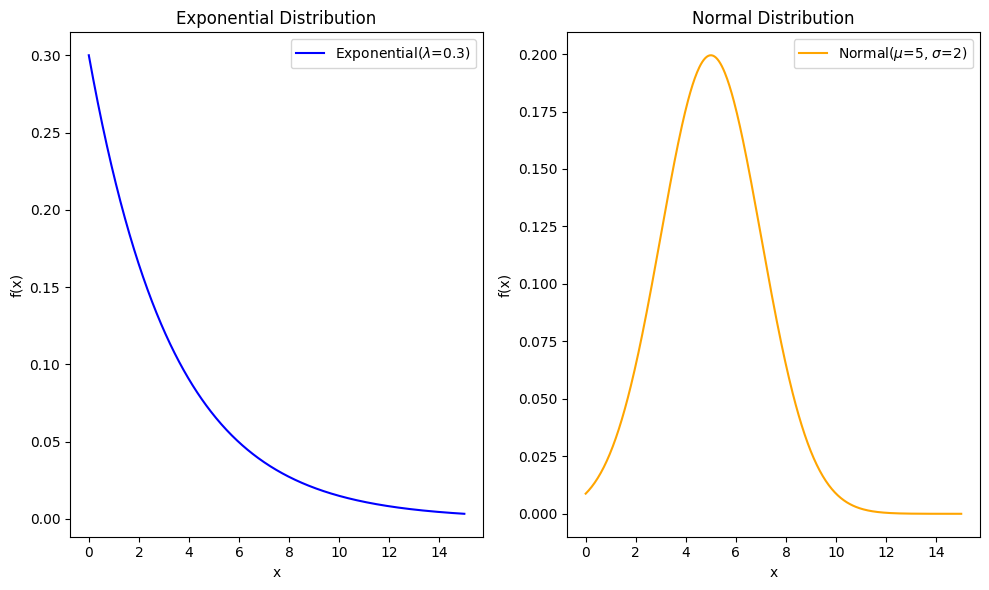

Exponential Distribution (λ=0.3):
Expected Value (E(X)) = 3.3333333333333335
Variance (V(X)) = 11.11111111111111
Standard Deviation (σ) = 3.3333333333333335


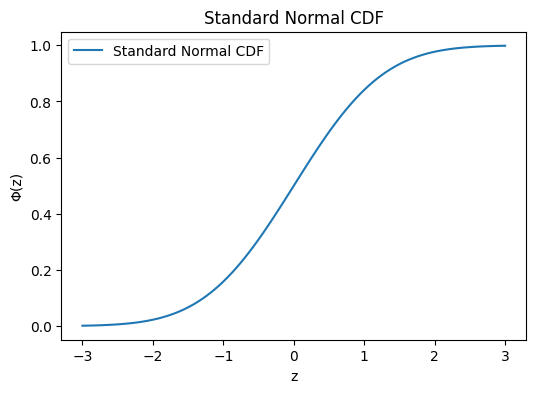

P(3 ≤ Z ≤ 7) for Normal Distribution (µ=5, σ=2) = 0.6826894921370859


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exponential distribution
def exponential_pdf(x, lambd):
    return lambd * np.exp(-lambd * x)

# Normal (Gaussian) distribution
def normal_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Calculate expected value (mean) for exponential distribution
def expected_value_exponential(lambd):
    return 1 / lambd

# Calculate variance for exponential distribution
def variance_exponential(lambd):
    return 1 / (lambd**2)

# Plot the PDFs for both distributions
x_vals = np.linspace(0, 15, 500)

# Parameters for the exponential and normal distributions
lambda_exp = 0.3
mu_norm = 5
sigma_norm = 2

# Calculate the exponential and normal PDF values
exp_pdf_vals = exponential_pdf(x_vals, lambda_exp)
norm_pdf_vals = normal_pdf(x_vals, mu_norm, sigma_norm)

# Plotting Distributions
plt.figure(figsize=(10, 6))

# Plot Exponential distribution
plt.subplot(1, 2, 1)
plt.plot(x_vals, exp_pdf_vals, label=f'Exponential($\\lambda$={lambda_exp})', color='blue')
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Plot Normal distribution
plt.subplot(1, 2, 2)
plt.plot(x_vals, norm_pdf_vals, label=f'Normal($\\mu$={mu_norm}, $\\sigma$={sigma_norm})', color='orange')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()

# Expected value and variance for exponential distribution
expected_val_exp = expected_value_exponential(lambda_exp)
variance_exp = variance_exponential(lambda_exp)
std_dev_exp = np.sqrt(variance_exp)

print(f"Exponential Distribution (λ={lambda_exp}):")
print(f"Expected Value (E(X)) = {expected_val_exp}")
print(f"Variance (V(X)) = {variance_exp}")
print(f"Standard Deviation (σ) = {std_dev_exp}")

# CDF for the normal distribution
z_val = np.linspace(-3, 3, 100)
standard_normal_cdf = stats.norm.cdf(z_val)

# Plot the standard normal CDF
plt.figure(figsize=(6, 4))
plt.plot(z_val, standard_normal_cdf, label='Standard Normal CDF')
plt.title("Standard Normal CDF")
plt.xlabel("z")
plt.ylabel("Φ(z)")
plt.legend()
plt.show()

# Calculating probability for a normal distribution between a and b
mu = mu_norm
sigma = sigma_norm
a = 3
b = 7

# Standardize and calculate the CDF for normal distribution
prob_between_a_b = stats.norm.cdf((b - mu) / sigma) - stats.norm.cdf((a - mu) / sigma)
print(f"P({a} ≤ Z ≤ {b}) for Normal Distribution (µ={mu}, σ={sigma}) = {prob_between_a_b}")
